<a href="https://colab.research.google.com/github/amitaipat-create/Session2/blob/main/Copy_of_Mission_3_Practice_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Practice 3: LangGraph Workflows

In [1]:
%pip install langgraph langchain==0.3.27 langchain-openai==0.3.29 langchain-community==0.3.27 langchain-core python-dotenv --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 27.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.3/74.3 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 87.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.4/155.4 kB 13.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 450.8/450.8 kB 37.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 948.6/948.6 kB 54.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 3.9 MB/s eta 0:00:00


In [2]:
import os
import getpass
from dotenv import load_dotenv

# Load environment variables from .env file (for local development)
load_dotenv()

# OpenAI API Key
if not os.environ.get("OPENAI_API_KEY"):
    os.environ["OPENAI_API_KEY"] = getpass.getpass("Enter your OpenAI API key: ")

Enter your OpenAI API key: ··········


In [3]:
from typing import TypedDict, Annotated
from langgraph.graph import StateGraph, END
from langchain_openai import ChatOpenAI
from langchain_core.messages import HumanMessage, AIMessage

llm = ChatOpenAI(model="gpt-4o-mini", temperature=0.7)

print("=" * 60)
print("PRACTICE 3: LANGGRAPH WORKFLOWS")
print("=" * 60)

PRACTICE 3: LANGGRAPH WORKFLOWS


In [4]:
try:
    from IPython.display import display, Markdown
except ImportError:
    def display(x): print(x)
    def Markdown(x): return x

llm = ChatOpenAI(model="gpt-4o-mini", temperature=0.7)

In [5]:
# ============================================================================
# CONCEPT 1: LangGraph StateGraph Creation
# Learning: Create a workflow graph to orchestrate multiple steps
# ============================================================================
print("\nCONCEPT 1: LangGraph StateGraph Creation")
print("-" * 60)

# Define state schema
class WorkflowState(TypedDict):
    messages: Annotated[list, lambda x, y: x + y]  # Accumulates messages
    data: dict  # Stores workflow data

# Create graph
graph = StateGraph(WorkflowState)
print("Created StateGraph with WorkflowState")


CONCEPT 1: LangGraph StateGraph Creation
------------------------------------------------------------
Created StateGraph with WorkflowState


In [6]:
# ============================================================================
# CONCEPT 2: Nodes and Edges Definition
# Learning: Define workflow steps (nodes) and connections (edges)
# ============================================================================
print("\nCONCEPT 2: Nodes and Edges Definition")
print("-" * 60)

def step1_process(state: WorkflowState) -> WorkflowState:
    """First step: Process input"""
    print("  → Step 1: Processing input")
    state["data"] = {"processed": True, "step": 1}
    return state

def step2_analyze(state: WorkflowState) -> WorkflowState:
    """Second step: Analyze"""
    print("  → Step 2: Analyzing")
    state["data"]["step"] = 2
    return state

def step3_finalize(state: WorkflowState) -> WorkflowState:
    """Third step: Finalize"""
    print("  → Step 3: Finalizing")
    state["data"]["step"] = 3
    state["data"]["complete"] = True
    return state

# Add nodes
graph.add_node("process", step1_process)
graph.add_node("analyze", step2_analyze)
graph.add_node("finalize", step3_finalize)

# Add edges (sequential flow)
graph.set_entry_point("process")
graph.add_edge("process", "analyze")
graph.add_edge("analyze", "finalize")
graph.add_edge("finalize", END)

# Compile graph
app = graph.compile()
print("Graph compiled with 3 nodes")

# Run workflow
initial_state = {"messages": [], "data": {}}
result = app.invoke(initial_state)
print(f"Workflow completed: {result['data']}")


CONCEPT 2: Nodes and Edges Definition
------------------------------------------------------------
Graph compiled with 3 nodes
  → Step 1: Processing input
  → Step 2: Analyzing
  → Step 3: Finalizing
Workflow completed: {'processed': True, 'step': 3, 'complete': True}


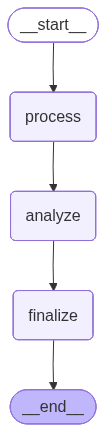

In [7]:
app

In [8]:
# ============================================================================
# EXERCISE 1: Try It Out - Create Your First Graph (EASY)
# Task: Create a simple 2-node workflow
# Instructions:
#   1. Create a new StateGraph with a simple state (just one field: "message": str)
#   2. Create 2 nodes: "start" and "end"
#   3. "start" node sets message to "Hello"
#   4. "end" node appends " World" to message
#   5. Connect: start → end → END
#   6. Run it and print the final message
# ============================================================================

# Define state schema
class SimpleState(TypedDict):
    message: str


def set_message(state: SimpleState) -> SimpleState:
    print("Setting message")
    state["message"] = "Hello"
    return state

simple_graph = StateGraph(SimpleState)
print("Created StateGraph with SimpleState")

# Add nodes
simple_graph.add_node("message", set_message)

# Add edges
simple_graph.set_entry_point("message")
simple_graph.add_edge("message", END)

simple_app = simple_graph.compile()
print("Graph compiled with 1 nodes")

# Run workflow
initial_state = {"message": ""}
result = simple_app.invoke(initial_state)
print(f"Workflow completed: {result['message']}")

Created StateGraph with SimpleState
Graph compiled with 1 nodes
Setting message
Workflow completed: Hello


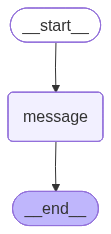

In [9]:
simple_app

In [10]:
# ============================================================================
# EXERCISE 1b: Try It Out - Create Your First Graph (EASY)
# Task: Create a simple 2-node workflow
# Instructions:
#   1. Create a new StateGraph with a simple state (just one field: "greeting": str)
#   2. Create 2 nodes: "start" and "end"
#   3. "start" node sets greeting to "Namaste"
#   4. "end" node appends " World" to greeting
#   5. Connect: start → end → END
#   6. Run it and print the final greeting
# ============================================================================
# greeting_app instead of simple_app
# greeting_graph instead of simple_Graph
# GreetingState instead of SimpleState


In [11]:
# ============================================================================
# EXERCISE 2: Try It Out - Create a 3-Step Workflow (EASY)
# Task: Create a workflow that processes a resume
# Instructions:
#   1. Create a state with: "resume_text": str, "status": str
#   2. Create 3 nodes:
#      - "parse": Sets status to "parsed"
#      - "validate": Sets status to "validated"
#      - "complete": Sets status to "completed"
#   3. Connect them sequentially: parse → validate → complete → END
#   4. Run with initial resume_text = "Python developer"
# ============================================================================

# Step 1.
# Define state schema
class ResumeState(TypedDict):
    status: str

# Step 2
# Create graph
resume_graph = StateGraph(ResumeState)
print("Created StateGraph with ResumeState")

def parse_process(state: ResumeState) -> ResumeState:
    """First step: Parse"""
    print("  → Step 1: Parsing")
    state["status"] = "parsed"
    return state

def validate_process(state: ResumeState) -> ResumeState:
    """Second step: Validate"""
    print("  → Step 2: Validating")
    state["status"] = "validated"
    return state

def complete_process(state: ResumeState) -> ResumeState:
    """Third step: Complete"""
    print("  → Step 3: Completing")
    state["status"] = "completed"
    return state

# Add nodes
resume_graph.add_node("parse", parse_process)
resume_graph.add_node("validate", validate_process)
resume_graph.add_node("complete", complete_process)

# Add edges (sequential flow)
resume_graph.set_entry_point("parse")
resume_graph.add_edge("parse", "validate")
resume_graph.add_edge("validate", "complete")
resume_graph.add_edge("complete", END)

# Compile graph
resume_app = resume_graph.compile()
print("Graph compiled with 3 nodes")

# Run workflow
initial_state = {"status": "Not started"}
result = resume_app.invoke(initial_state)
print(f"Workflow completed: {result['status']}")



Created StateGraph with ResumeState
Graph compiled with 3 nodes
  → Step 1: Parsing
  → Step 2: Validating
  → Step 3: Completing
Workflow completed: completed


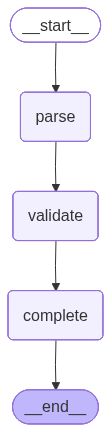

In [12]:
resume_app

In [13]:
# ============================================================================
# CONCEPT 3: State Management and State Schema
# Learning: Manage state across workflow steps
# ============================================================================
print("\nCONCEPT 3: State Management")
print("-" * 60)

class AgentState(TypedDict):
    input_text: str
    processed_text: str
    final_result: str

def process_node(state: AgentState) -> AgentState:
    state["processed_text"] = state["input_text"].upper()
    return state

def finalize_node(state: AgentState) -> AgentState:
    state["final_result"] = f"Complete: {state['processed_text']}"
    return state

state_graph = StateGraph(AgentState)
state_graph.add_node("process", process_node)
state_graph.add_node("finalize", finalize_node)
state_graph.set_entry_point("process")
state_graph.add_edge("process", "finalize")
state_graph.add_edge("finalize", END)

state_app = state_graph.compile()
result = state_app.invoke({"input_text": "Hello", "processed_text": "", "final_result": ""})
print(f"Final result: {result['final_result']}")


CONCEPT 3: State Management
------------------------------------------------------------
Final result: Complete: HELLO


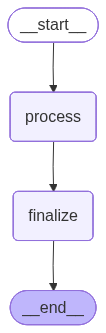

In [14]:
state_app

In [15]:
# ============================================================================
# EXERCISE 3: Try It Out - Pass Data Through State (EASY)
# Task: Create a workflow that transforms data step by step
# Instructions:
#   1. Create state with: "name": str, "greeting": str, "final": str
#   2. Create 2 nodes:
#      - "create_greeting": Sets greeting to "Hello, {name}!"
#      - "add_exclamation": Sets final to "{greeting} Welcome!"
#   3. Connect: create_greeting → add_exclamation → END
#   4. Run with name = "Alice"
#   5. Print the graph
# ============================================================================







CONCEPT 4: Conditional Routing
------------------------------------------------------------


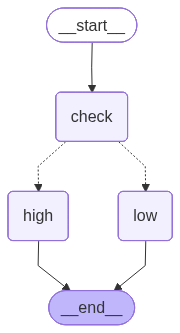

In [16]:
# ============================================================================
# CONCEPT 4: Conditional Routing (if/else logic)
# Learning: Route workflow based on conditions
# ============================================================================
print("\nCONCEPT 4: Conditional Routing")
print("-" * 60)

class RoutingState(TypedDict):
    value: int
    path: str

def check_value(state: RoutingState) -> RoutingState:
    """Check value and set path"""
    if state["value"] > 50:
        state["path"] = "high"
    else:
        state["path"] = "low"
    return state

def handle_high(state: RoutingState) -> RoutingState:
    print("  → High value path")
    return state

def handle_low(state: RoutingState) -> RoutingState:
    print("  → Low value path")
    return state

# Create graph with conditional routing
routing_graph = StateGraph(RoutingState)
routing_graph.add_node("check", check_value)
routing_graph.add_node("high", handle_high)
routing_graph.add_node("low", handle_low)

routing_graph.set_entry_point("check")

# Conditional edge based on state
def route_decision(state: RoutingState) -> str:
    return state["path"]

routing_graph.add_conditional_edges("check", route_decision, {
    "high": "high",
    "low": "low"
})
routing_graph.add_edge("high", END)
routing_graph.add_edge("low", END)

routing_app = routing_graph.compile()

routing_app

In [17]:
# Test routing
result1 = routing_app.invoke({"value": 75, "path": ""})
result2 = routing_app.invoke({"value": 25, "path": ""})

  → High value path
  → Low value path


In [18]:
# ============================================================================
# EXERCISE 4: Try It Out - Conditional Routing (DO IT LATER)
# Task: Create conditional routing based on match score
# Instructions:
#   1. Create state with: "match_score": int, "result": str
#   2. Create 3 nodes:
#      - "check_score": Sets result to "pass" if score > 70, else "fail"
#      - "pass_node": Prints "Candidate passed!"
#      - "fail_node": Prints "Candidate failed"
#   3. Use conditional routing: check_score → (pass_node OR fail_node) → END
#   4. Test with scores 85 and 60
# ============================================================================





In [19]:
# ============================================================================
# CONCEPT 5: Workflow Orchestration (Sequential and Parallel)
# Learning: Orchestrate agents from Practice 2 in a workflow
# ============================================================================
print("\nCONCEPT 5: Workflow Orchestration with Agents")
print("-" * 60)

class AgentWorkflowState(TypedDict):
    resume_text: str
    extracted_skills: str
    match_score: str

def agent1_extract(state: AgentWorkflowState) -> AgentWorkflowState:
    """Agent 1: Extract skills"""
    print("  → Agent 1: Extracting skills")
    state["extracted_skills"] = "Python, FastAPI"  # Simplified
    return state

def agent2_match(state: AgentWorkflowState) -> AgentWorkflowState:
    """Agent 2: Calculate match"""
    print("  → Agent 2: Calculating match")
    state["match_score"] = "85%"
    return state

# Create workflow with agents
agent_graph = StateGraph(AgentWorkflowState)
agent_graph.add_node("extract", agent1_extract)
agent_graph.add_node("match", agent2_match)

agent_graph.set_entry_point("extract")
agent_graph.add_edge("extract", "match")
agent_graph.add_edge("match", END)

agent_app = agent_graph.compile()

result = agent_app.invoke({"resume_text": "Python developer", "extracted_skills": "", "match_score": ""})
print(f"Workflow result: {result}")


CONCEPT 5: Workflow Orchestration with Agents
------------------------------------------------------------
  → Agent 1: Extracting skills
  → Agent 2: Calculating match
Workflow result: {'resume_text': 'Python developer', 'extracted_skills': 'Python, FastAPI', 'match_score': '85%'}


In [20]:
# ============================================================================
# EXERCISE 5: Try It Out - Orchestrate 3 Agents (DO IT LATER)
# Task: Create a workflow with 3 sequential agent steps
# Instructions:
#   1. Create state with: "input": str, "step1": str, "step2": str, "step3": str
#   2. Create 3 nodes (simplified agents):
#      - "agent1": Sets step1 to "Extracted: {input}"
#      - "agent2": Sets step2 to "Matched: {step1}"
#      - "agent3": Sets step3 to "Evaluated: {step2}"
#   3. Connect sequentially: agent1 → agent2 → agent3 → END
#   4. Run with input = "Python skills"
# ============================================================================




In [21]:
# ============================================================================
# CONCEPT 6: State Transitions and Data Passing
# Learning: Pass data between workflow steps
# ============================================================================
print("\nCONCEPT 6: State Transitions and Data Passing")
print("-" * 60)

class DataFlowState(TypedDict):
    input_data: str
    step1_output: str
    step2_output: str
    final_output: str

def step1(state: DataFlowState) -> DataFlowState:
    state["step1_output"] = f"Processed: {state['input_data']}"
    print(f"  Step 1: {state['step1_output']}")
    return state

def step2(state: DataFlowState) -> DataFlowState:
    state["step2_output"] = f"Analyzed: {state['step1_output']}"
    print(f"  Step 2: {state['step2_output']}")
    return state

def step3(state: DataFlowState) -> DataFlowState:
    state["final_output"] = f"Final: {state['step1_output']} + {state['step2_output']}"
    print(f"  Step 3: {state['final_output']}")
    return state

flow_graph = StateGraph(DataFlowState)
flow_graph.add_node("step1", step1)
flow_graph.add_node("step2", step2)
flow_graph.add_node("step3", step3)
flow_graph.set_entry_point("step1")
flow_graph.add_edge("step1", "step2")
flow_graph.add_edge("step2", "step3")
flow_graph.add_edge("step3", END)

flow_app = flow_graph.compile()
result = flow_app.invoke({
    "input_data": "Resume data",
    "step1_output": "",
    "step2_output": "",
    "final_output": ""
})
print(f"Data flow complete: {result['final_output']}")


CONCEPT 6: State Transitions and Data Passing
------------------------------------------------------------
  Step 1: Processed: Resume data
  Step 2: Analyzed: Processed: Resume data
  Step 3: Final: Processed: Resume data + Analyzed: Processed: Resume data
Data flow complete: Final: Processed: Resume data + Analyzed: Processed: Resume data


In [22]:
# ============================================================================
# EXERCISE 6: Try It Out - Complete 4-Step Workflow (DO IT LATER)
# Task: Create a complete resume processing workflow
# Instructions:
#   1. Create state with: "resume": str, "extracted": str, "matched": str, "analyzed": str, "generated": str
#   2. Create 4 nodes:
#      - "extract": Sets extracted to "Skills: Python, FastAPI"
#      - "match": Sets matched to "Match: 85%"
#      - "analyze": Sets analyzed to "Analysis: Good fit"
#      - "generate": Sets generated to "Report: Ready"
#   3. Connect sequentially: extract → match → analyze → generate → END
#   4. Each node should use data from previous node
#   5. Run with resume = "Python developer with FastAPI"
# ============================================================================



